# リンク解析: PageRank 補足資料+演習用ノートブック v2

- 氏名:
- 学生番号:

このノートブックでは，PageRankアルゴリズムの実装例を通して、アルゴリズムの理解を深めることを目的とします．
- 6月9日講義配布版からの修正点: 1.3 確率行列へ修正しない行列で行うべき乗法のコード

## 演習課題
- 本ノートブックの「必須課題」に取り組みノートブックを完成させ，このノートブックをユニパより提出すること
- 任意課題は任意である．

## 提出締切
- 締切: 6月30日（水） 講義開始時まで
- 提出方法: ユニバーサルパスポートにこのノートブックを提出

# 0. ライブラリのインストール・インポート
この演習では以下のライブラリを使用します．
- [NetworkX](https://networkx.github.io/)
   - グラフの生成，分析，描画などグラフに対する各種操作のためのPythonライブラリ
   
2つ下のセルある， `networkx`のimportに失敗する場合は，以下のコマンドをコメントアウトし実行してnetworkxをインストールしてください．

In [1]:
# !conda install networkx

In [2]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%precision 2

'%.2f'

# 1. 講義資料に沿ったPageRankの説明

## 1.1 グラフの準備と可視化

In [8]:
import decorator
decorator.__version__

'4.3.0'

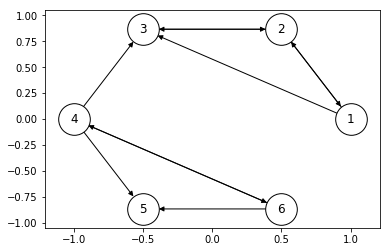

In [6]:
G = nx.DiGraph() #有向グラフの生成
G.add_nodes_from([1,2,3,4,5,6]) #ノードの定義
G.add_edges_from([(1,2),(1,3), #エッジの定義 (1,2) は ノード1　から　ノード2　へ有向エッジがあることを意味
                  (2,1),(2,3),
                  (3,2),
                  (4,3),(4,5),(4,6),
                  (6,4),(6,5)])
# pos = nx.spring_layout(G)  #バネモデルでグラフをレイアウト
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="w",  edgecolors="k") # グラフを描画
plt.show()

## 1.2 べき乗法によるPageRankアルゴリズムの実行

$\boldsymbol{p} = dA^T\boldsymbol{p} + (1-d)\frac{1}{n}\boldsymbol{e}$

遷移確率行列 $A$ の定義（講義資料後半の確率行列への修正を行っています）

In [ ]:
 A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/3, 1/3],
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    [0, 0, 0, 1/2, 1/2, 0],
])
A

べき乗法の適用

In [ ]:
# 各種変数の設定
n = 6 # ノードの数
d = 0.85 # ダンピングファクター
e = np.array([1, 1, 1, 1, 1, 1]) # np.ones(n) 各要素が1のn次元ベクトル
print("e=",e)

# べき乗法（簡易版）
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # np.ones(n) / n  # 初期PageRankベクトル（=初期状態分布）の設定
print("初期PageRankベクトル:", p)
for i in range(10):
    p = d * np.dot(A.T, p) + (1-d)*(1/n)* e
    print(f"{i+1}回目のページランクベクトル:{p}")

In [ ]:
# networkxのpagerank関数と結果が一致するか念のため確認・・・
nx.pagerank(G, alpha=0.85, tol=1e-6) # alphaがdamping factorに対応（default0.85), tolはべき乗法の収束判定のepsilon
# networkxは他にも， nx.pagerank_scipyや nx.pagerank_numpyといった 比較的大規模なデータのためのpagerank計算関数も提供しています

## 1.3 確率行列へ修正しない行列で行うべき乗法


この行列Aに対して，以下の式でべき乗法を実行してみます．
$\boldsymbol{p} = A^T\boldsymbol{p}$
- 補足: 6月9日に配ったノートブックは， ダンピングファクター $d$ がコードに残ってしまっていました（$\boldsymbol{p} = dA^T\boldsymbol{p}$　という式になってしまっていました．この式だと$d<1.0$のときに$\boldsymbol{p}$の長さが小さくなっていくのは自明です）．訂正いたします．

In [ ]:
A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/3, 1/3],
    [0, 0, 0, 0, 0, 0], #ここが確率行列になっていない
    [0, 0, 0, 1/2, 1/2, 0],
])
A

# べき乗法（簡易版）
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # np.ones(n) / n  # 初期値の設定
print("初期ページランクベクトル:", p)
for i in range(10):
    p = np.dot(A.T, p)
    print(f"{i+1}回目のページランクベクトル:{p}") 
    print(f"{i+1}回目のページランクベクトルのL1ノルム:{np.linalg.norm(p, ord=1)}") 
    print()

ノード4,5,6に対するPageRank値がどんどん小さくなっていっているのが分かります
- 補足: 今回は3->4へのリンクがありませんが， 3->4へのリンクがあると，全てのノードに対するPageRank値が0に近づいていきます

3->4へのリンクを追加した遷移確率行列$A$を用いて， $p=A^Tp$

In [ ]:
A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1/2, 0, 1/2, 0, 0], # ページ3からページ4へのリンクを新たに張ってみる
    [0, 0, 1/3, 0, 1/3, 1/3],
    [0, 0, 0, 0, 0, 0], #ここが確率行列になっていない
    [0, 0, 0, 1/2, 1/2, 0],
])
A

# べき乗法（簡易版）
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # np.ones(n) / n  # 初期値の設定
print("初期ページランクベクトル:", p)
for i in range(10):
    p = np.dot(A.T, p)
    print(f"{i+1}回目のページランクベクトル:{p}") 
    print(f"{i+1}回目のページランクベクトルのL1ノルム:{np.linalg.norm(p, ord=1)}") 
    print()

## 1.4 固有値との関係

In [ ]:
 A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/3, 1/3],
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    [0, 0, 0, 1/2, 1/2, 0],
])
A

In [ ]:
M = d * A.T + (1-d)*(1/n) * np.ones([n,n])
M

In [ ]:
l, x = np.linalg.eig(M) # M の固有値と固有ベクトルを求める

In [ ]:
print(l) # 固有値のリスト
print(np.abs(l[0])) # 最大の固有値

In [ ]:
np.abs(x[:, 0])  / np.abs(x[:, 0]).sum() # 最大の固有値に対応する固有ベクトル（をL1ノルムが1になるように正規化したもの）

べき乗法で求めたPageRank値ベクトルと一致していますね！

## 2. もう少し丁寧なPageRankアルゴリズムの実装

参考までに，べき乗法に基づくPageRankアルゴリズムは以下のように記述できます． 

In [ ]:
def pagerank(A, d = 0.85, eps = 1e-6):
    """
      A: 遷移確率行列（確率行列の修正済み）
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e = np.ones(A.shape[0]) #要素が1のn次元ベクトル
    p = e  / n #PageRankベクトルの初期化（初期状態分布）
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        p_next = d * np.dot(A.T, p) + (1.0 - d) * e / n # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
    return p

では，上記のアルゴリズムを用いて，実際のグラフでPageRankを計算してみましょう．

簡単のため，以下のような3ノードの有向グラフ$G$を考えます．

In [ ]:
# 有向グラフの描画
G = nx.DiGraph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(3,2)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="w",  edgecolors="k")
plt.show()

このグラフ$G$に対応する遷移確率行列$A$は下記のように定義できます（「確率行列」となるよう，ページ2に対応する遷移確率の修正を行っている点に注意）．

In [ ]:
A = np.array([
    [0, 1, 0],
    [1/3, 1/3, 1/3],
    [0, 1, 0]
])
A

$d = 0.85$, $\epsilon = 10^{-6}$としたときのPageRankベクトル ${\mathbf p} = \{ p_1, p_2, p_3 \}$ は，以下のように求められます．

In [ ]:
p = pagerank(A, d = 0.85, eps=1e-6)
p

$p_1=0.21, p_2=0.57,  p_3=0.21$となり，多くの入リンクを持つページ$2$が高いPageRank値を持つであろうという直感と一致することがわかります．

# 演習課題

1. を参考に，以下の課題に取り組んでみてください．　適宜セルを複数作成してもらって構いません．

## 必須課題: PageRankアルゴリズムの確認

講義資料「リンク解析その1」 p.4のグラフに対して，行列$A$が確率行列の性質を満たすよう修正し,べき乗法に基づくPageRankの計算を適用し，どのノードが最も高いPageRank値となったか結果を報告せよ．
ダンピングファクターは $d = 0.85$とせよ．

さらに，さまざまな初期状態分布（つまり，初期PageRankベクトル，値の総和は1である必要がある）に対してべき乗法に基づくPageRankの計算を適用し，異なる初期状態分布に対しても同じPageRankベクトルが得られることを確認せよ．

補足: 1.1と1.2 を参考にコードを書いてみましょう．

## 任意課題: 定常分布

講義で述べたように，マルコフ連鎖が一意の定常分布 ${\mathbf \pi}$ を持つためには，そのマルコフ連鎖は既約かつ非周期的である必要がある．そこで，「既約ではあるが非周期的でないマルコフ連鎖」であるようなグラフ$G$を用意し，$G$に対してテレポーテーションを用いない単純なPageRankアルゴリズム（すなわち，${\mathbf p} = A^{T}{\mathbf p}$）に基づくべき乗法を適用することで，初期状態分布によってはPageRankベクトルが収束しない場合があることを確認せよ．

- 用意したグラフ$G$をNetworkXで可視化すること
- 用意したグラフ$G$は，講義で使用した例とは異なる例を用いること

補足: まずは 1.1 を参考に，グラフ$G$を用意してnetworkxで可視化してみましょう． 次に，初期状態分布によってはべき乗法で定常状態が求まることもありますので，いろいろな初期状態分布で1.3で書いた${\mathbf p} = A^{T}{\mathbf p}$に基づくべき乗法をためしてみましょう．
